<a href="https://colab.research.google.com/github/henrynguyen13/CTDL/blob/master/GenAI_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ẩn đầu ra của lệnh pip install

Cài đặt các thư viện cần thiết

Câu lệnh %%capture dùng ẩn đi đầu ra của lệnh pip install bên dưới

Viết 1 dòng lệnh cài đặt các thư viện sau torch-snippets: thư viên các công cụ cho Pytorch; thư viện transformer; và thư viện kaggle: cung cấp API để truy cập Kaggle

In [ ]:
%%capture

!pip install torch-snippets transformers kaggle

Cài đặt thư viện autoreload để tự động tải lại các module đã sửa đổi trong notebook.

Viết 1 dòng code import toàn bộ các hàm của thư viện torch_snippets

In [ ]:
%reload_ext autoreload
%autoreload 2
from torch_snippets import *

Import thư viện torch

In [ ]:
import torch

Viết lệnh để import lớp Dataset và DataLoader từ torch.utils.data.

In [ ]:
from torch.utils.data import Dataset, DataLoader

Import thư viện torch.nn dưới tên gọi nn.

In [ ]:
import torch.nn as nn

Import thư viện transforms từ torchvision.

In [ ]:
from torchvision import transforms

Câu lệnh cài opencv-python
Sau đó 1 câu lệnh import cv2

In [ ]:
#2 dòng code tại đây
!pip install opencv-python
import cv2

Cài đặt matplotlib
Import module pyplot của matplotlib dưới tên gọi plt

In [ ]:
from matplotlib import pyplot as plt

Dòng code 1: Làm thế nào để import các lớp ViTModel và ViTConfig từ thư viện transformers?

Dòng code 2: Viết lệnh import Adam từ torch.optim.

Dòng code 3: đặt giá trị cho biến model_checkpoint bằng giá trị 'google/vit-base-patch16-224-in21k': đây là một checkpoint của mô hình Vision Transformer (ViT) được Google huấn luyện trước trên tập dữ liệu ImageNet-21k với độ phân giải đầu vào là 224x224.

In [ ]:
#3 dòng code tại đây
from transformers import ViTConfig, ViTModel
from torch.optim import Adam
model_checkpoint = 'google/vit-base-patch16-224-in21k'

Dòng code 1:  dòng code cài đặt thư viện torchmetrics

Dòng code 2: để import các hàm MultilabelAccuracy, MultilabelF1Score, MultilabelPrecision, và MultilabelRecall từ torchmetrics.classification

 Dòng code 3: import defaultdict từ collections

 Dòng code 4: Tạo lớp Report

 Dòng code 5: Khởi tạo _init_

 Dòng code 6: trong init: Nhận vào tham số epochs (số lượng epoch trong quá trình huấn luyện).

 Dòng code 7: trong init: dùng để khởi tạo thuộc tính history của đối tượng thành một đối tượng defaultdict với kiểu giá trị mặc định là list.

In [ ]:
!pip install torchmetrics
from torchmetrics.classification import MultilabelAccuracy, MultilabelF1Score, MultilabelPrecision, MultilabelRecall
from collections import defaultdict
class Report:
  def __init__(self, epochs):
    self.epochs = epochs
    self.history = defaultdict(list)

  def record(self, epoch, trn_loss=None, trn_acc=None, val_acc=None, end='\r'):
      if trn_loss is not None:
          self.history['trn_loss'].append(trn_loss)
      if trn_acc is not None:
          self.history['trn_acc'].append(trn_acc)
      if val_acc is not None:
          self.history['val_acc'].append(val_acc)

      # Xây dựng chuỗi dựa trên các giá trị sẵn có
      print_str = f"Epoch: {epoch:.2f}/{self.epochs}"
      if trn_loss is not None:
          print_str += f", trn_loss: {trn_loss:.4f}"
      if trn_acc is not None:
          print_str += f", trn_acc: {trn_acc:.4f}"
      if val_acc is not None:
          print_str += f", val_acc: {val_acc:.4f}"

      print(print_str, end=end) # In chuỗi

  def report_avgs(self, epoch):
        trn_loss = np.mean(self.history['trn_loss'][-len(trn_dl):])  # Average over last epoch
        trn_acc = np.mean(self.history['trn_acc'][-len(trn_dl):])    # Average over last epoch
        val_acc = np.mean(self.history['val_acc'][-len(val_dl):])    # Average over last epoch
        print(f"Epoch: {epoch}/{self.epochs}, trn_loss: {trn_loss:.4f}, trn_acc: {trn_acc:.4f}, val_acc: {val_acc:.4f}")

  def plot(self, keys, sz=2, figsize=(12,6)):
        plt.figure(figsize=figsize)
        for k in keys:
            plt.plot(self.history[k], label=k)
        plt.legend(fontsize=sz)
        plt.show()

  def plot_epochs(self, keys, figsize=(12, 6)):
        epochs = range(1, self.epochs + 1)  # Assuming epochs start from 1

        plt.figure(figsize=figsize)
        for k in keys:
            # Trích xuất dữ liệu cho khóa hiện tại và tính trung bình theo từng epoch
            values = self.history[k]
            epoch_averages = [np.mean(values[i-len(trn_dl):i]) for i in range(len(trn_dl), len(values)+1, len(trn_dl))]
            plt.plot(epochs, epoch_averages, label=k)

        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel("Metric Value")
        plt.title("Epoch-wise Metrics")
        plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 20.6 MB/s eta 0:00:00


tạo một tệp tin tên là kaggle.json và ghi nội dung JSON vào đó. Nội dung JSON này chứa thông tin xác thực cho tài khoản Kaggle, gồm:

username: Tên người dùng của bạn trên Kaggle.
key: API key (khóa API) để truy cập vào các dịch vụ của Kaggle, ví dụ như tải dữ liệu từ các cuộc thi hoặc bộ dữ liệu công khai.
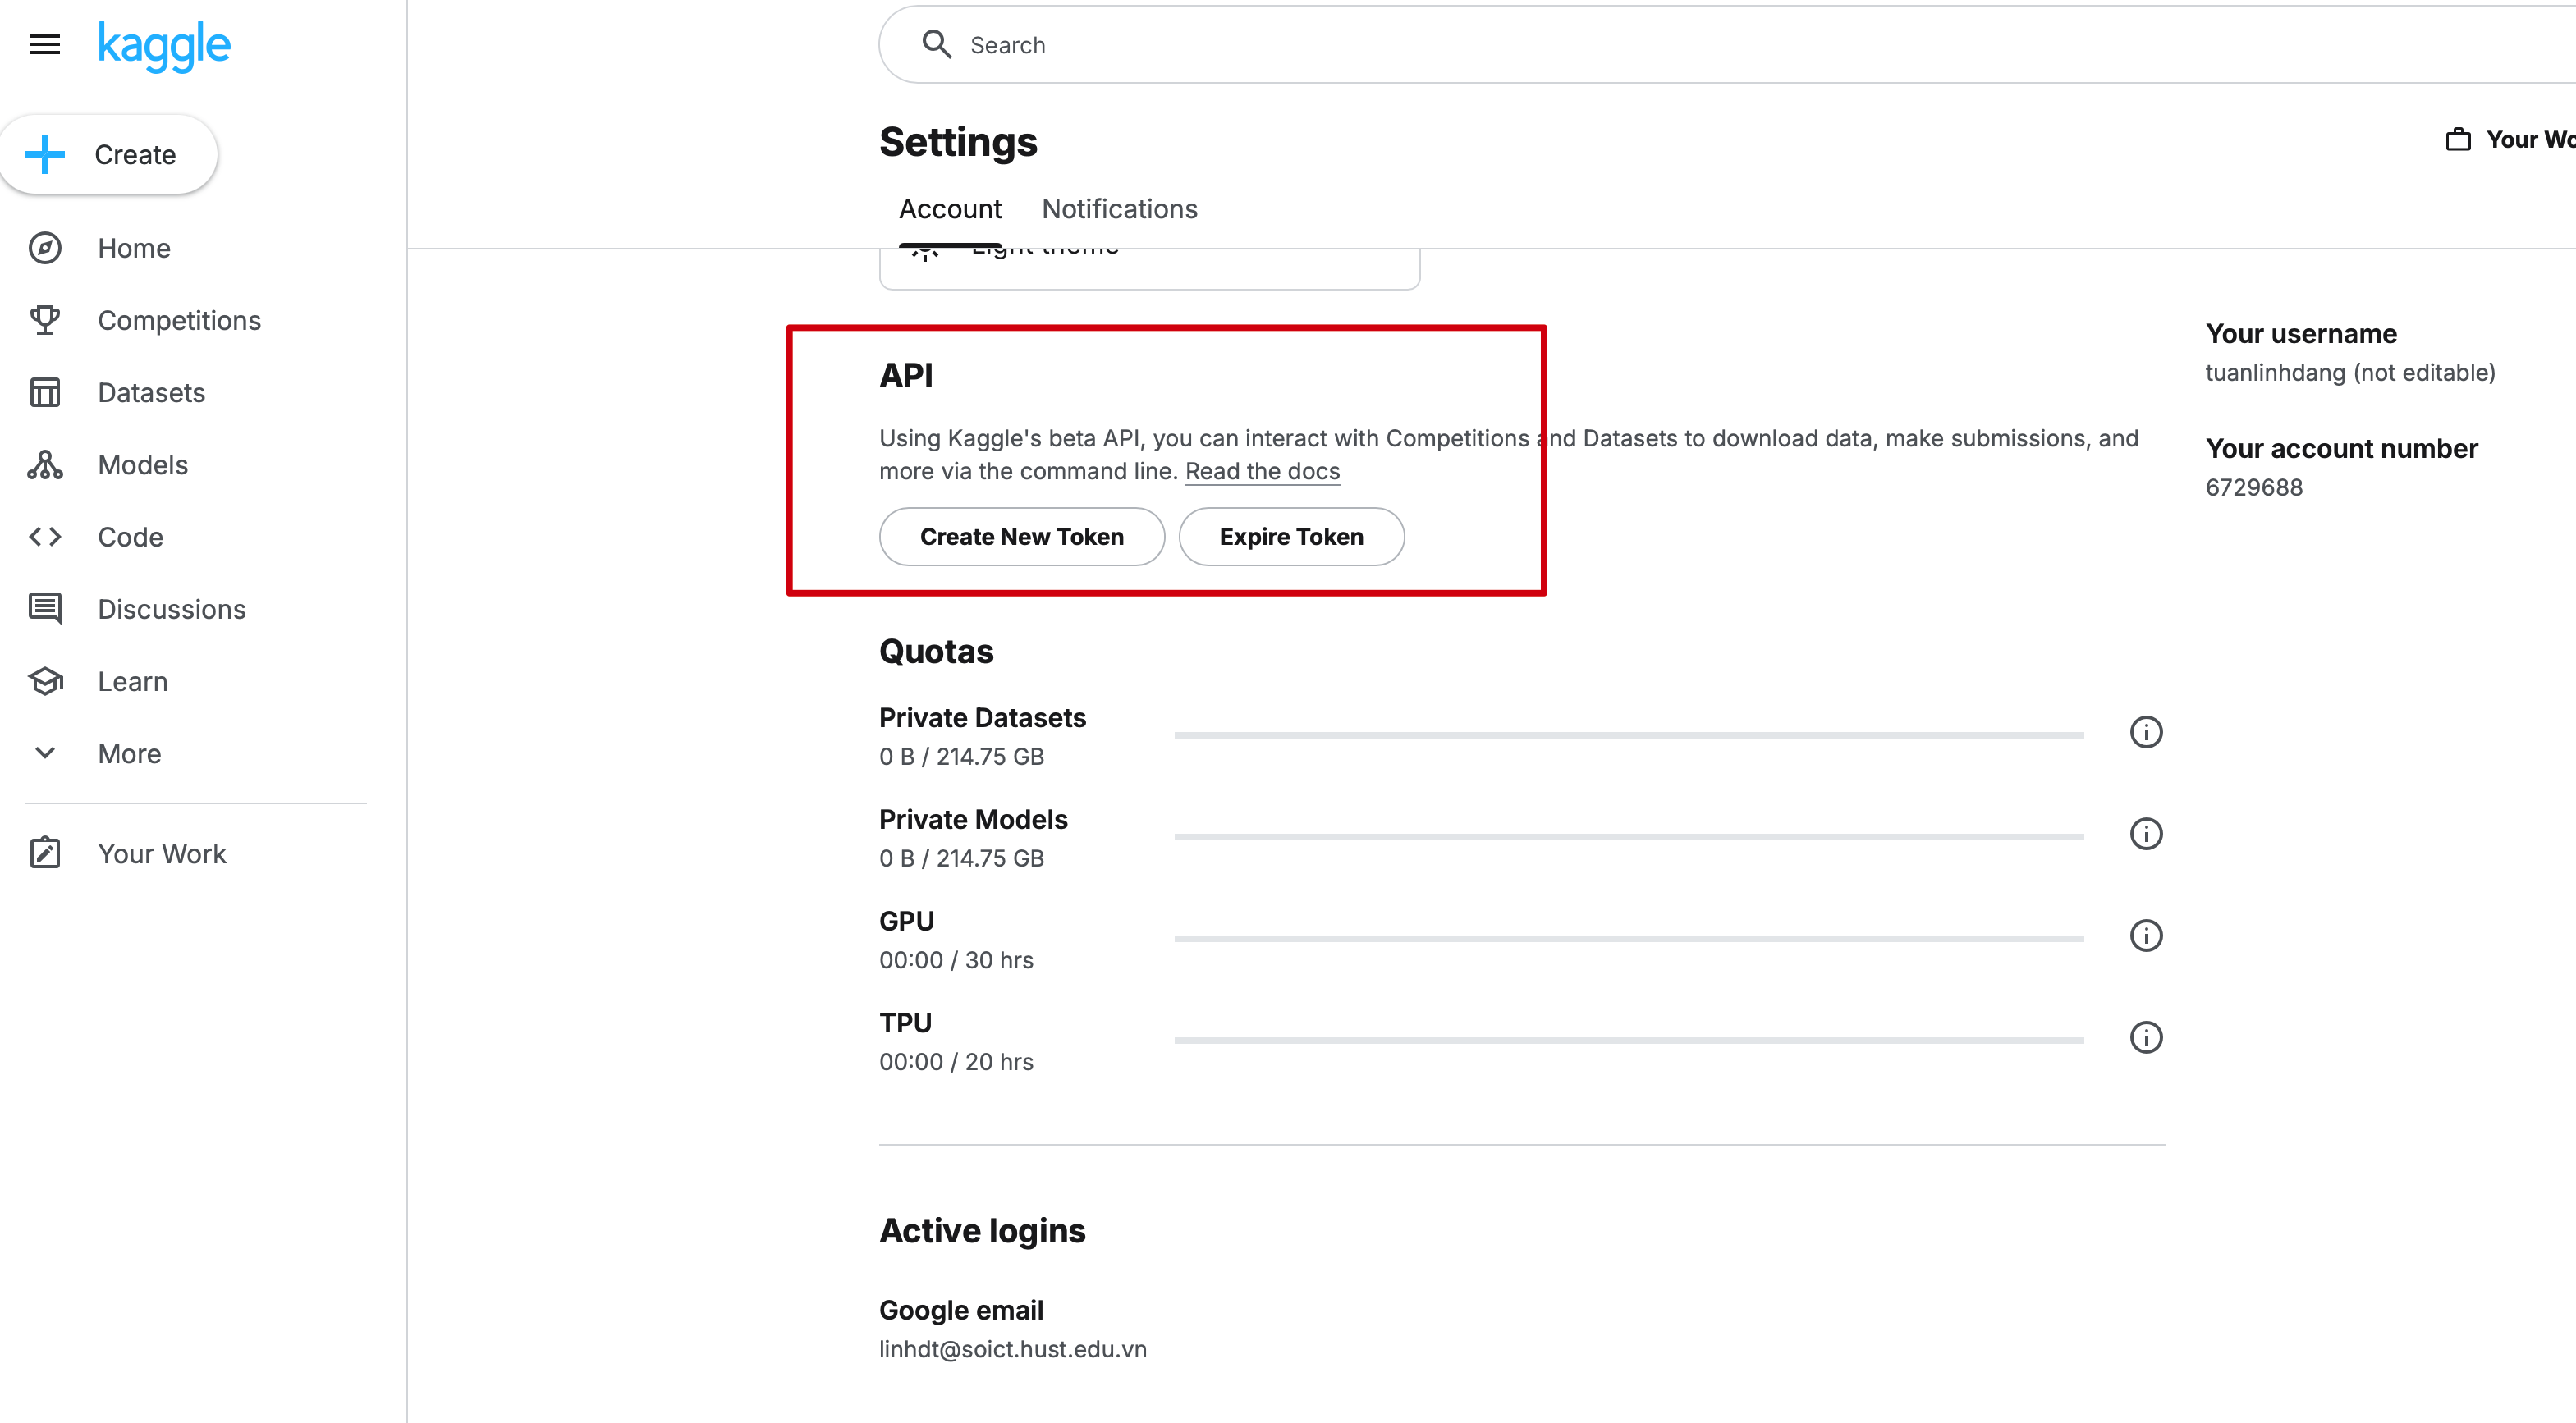

In [ ]:
%%writefile kaggle.json
{"username":"henrynguyen131","key":"d9f76479115fa035c9a81930726aa39a"}

Writing kaggle.json


Dòng code 1: Ẩn đầu ra của các lệnh được thực thi trong cell này, để tránh việc in ra thông tin không cần thiết như quá trình tạo thư mục hoặc thông báo tải xuống.

Dòng code 2: Tạo thư mục .kaggle trong thư mục gốc của người dùng (~/.kaggle). Cờ -p đảm bảo rằng nếu thư mục đã tồn tại, nó sẽ không báo lỗi.

Dòng code 3: Sao chép tệp kaggle.json chứa thông tin xác thực API vào thư mục .kaggle.

Dòng code 4:  Thay đổi quyền truy cập của tệp kaggle.json để bảo mật thông tin sang 600. Cụ thể, 600 nghĩa là chỉ người sở hữu tệp mới có quyền đọc và ghi, người khác sẽ không có quyền truy cập.

Dòng code 5: Tải bộ dữ liệu từ Kaggle với ID tongpython/cat-and-dog về máy.

Dòng code 6:  Giải nén tệp cat-and-dog.zip vừa tải xuống để truy cập dữ liệu.

In [ ]:
%%capture
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download tongpython/cat-and-dog
!unzip cat-and-dog.zip


đặt đường dẫn cho các thư mục dữ liệu huấn luyện và dữ liệu kiểm tra:

train_data_dir: chứa đường dẫn đến thư mục tập dữ liệu huấn luyện (training_set/training_set).

test_data_dir: chứa đường dẫn đến thư mục tập dữ liệu kiểm tra (test_set/test_set).

In [ ]:
#2 dòng code tại đây
train_data_dir = 'training_set/training_set'
test_data_dir = 'test_set/test_set'


In [ ]:
from glob import glob as Glob
class CatsDogs(Dataset):
    def __init__(self, folder):
        cats = Glob(folder+'/cats/*.jpg')
        dogs = Glob(folder+'/dogs/*.jpg')
        self.fpaths = cats[:500] + dogs[:500]
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        from random import shuffle, seed; seed(10); shuffle(self.fpaths)
        self.targets = [os.path.basename(fpath).startswith('dog') for fpath in self.fpaths]
    def __len__(self): return len(self.fpaths)
    def __getitem__(self, ix):
        f = str(self.fpaths[ix])
        target = self.targets[ix]
        im = (cv2.imread(f)[:,:,::-1])
        im = cv2.resize(im, (224,224))
        im = torch.tensor(im/255)
        im = im.permute(2,0,1)
        im = self.normalize(im)
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        return im.float().to(device), torch.tensor([target]).float().to(device)

def get_data():
    train = CatsDogs(train_data_dir)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True, drop_last = True)
    val = CatsDogs(test_data_dir)
    val_dl = DataLoader(val, batch_size=32, shuffle=True, drop_last = True)
    return trn_dl, val_dl

Khởi tạo cấu hình mặc định cho ViT sử dung hàm ViTConfig

In [ ]:
#1 dòng code
config = ViTConfig()
print(config)

ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.44.2"
}



In [ ]:
#1 dòng code: Định nghĩa một lớp ViT, kế thừa từ nn.Module
class ViT(nn.Module):
  def __init__(self, config=ViTConfig(), num_labels=1, checkpoint = "google/vit-base-patch16-224-in21k"): # 1 đoạn code miêu tả sử dụng checkpoint của ViT là 'google/vit-base-patch16-224-in21k' để tải pretrained)
        #1 dòng code: Gọi hàm khởi tạo của lớp cha nn.Module để đảm bảo lớp ViT được khởi tạo đúng cách.
        super(ViT, self).__init__()
        #1 dòng code: Tạo một mô hình ViT (ViTModel) từ checkpoint đã được huấn luyện sẵn, hàm from_pretrained, chú ý cấu hình add_pooling_layer=False
        self.vit = ViTModel.from_pretrained(checkpoint, add_pooling_layer=False)
        # 1 dòng code:  Định nghĩa một lớp tuyến tính Linear đầu tiên (classifier1) trong bộ phân loại, chuyển đổi kích thước đầu ra từ ViT (kích thước config.hidden_size) thành một vector 128 chiều.
        self.classifier1 = nn.Linear(config.hidden_size, 128)
        # 1 dòng code: Định nghĩa lớp tuyến tính Linear thứ hai (classifier2), chuyển từ 128 chiều thành số nhãn mong muốn (num_labels).
        self.classifier2 = nn.Linear(128, num_labels)
        #tạo một đoạn gồm vài dòng code sử dụng Sequential gồm: classifier1, ReLU, classifier2
        self.classifier = nn.Sequential(self.classifier1, nn.ReLU(), self.classifier2)
       # Code: Đóng băng các tham số của mô hình ViT (self.vit) bằng cách đặt requires_grad = False, để tránh việc cập nhật chúng trong quá trình huấn luyện
        for param in self.vit.parameters():
            param.requires_grad = False
  def forward(self, x):
    x = self.vit(x)['last_hidden_state']
    output = self.classifier(x[:, 0, :])
    #1 dòng code: Áp dụng hàm sigmoid (torch.sigmoid) để đưa đầu ra về khoảng (0, 1), thích hợp cho bài toán phân loại nhị phân hoặc multi-label.
    output = torch.sigmoid(output)
    return output

In [ ]:
#Viết hàm train_batch()
    #với các tham số: x: Batch dữ liệu đầu vào; y: Batch nhãn tương ứng với dữ liệu đầu vào; model: Mô hình đang được huấn luyện; opt: Bộ tối ưu hóa (optimizer) dùng để cập nhật trọng số của mô hình; loss_fn: Hàm mất mát (loss function) dùng để tính toán lỗi của mô hình.
    #Goi hàm train()
    #thực hiện dự đoán
    #Tính toán mất mát cho batch hiện tại bằng cách so sánh đầu ra prediction với nhãn thật y thông qua hàm mất mát loss_fn. batch_loss là giá trị mất mát cho batch.
    #Thực hiện lan truyền ngược (backpropagation) để tính toán gradient của hàm mất mát đối với các tham số của mô hình. Điều này chuẩn bị cho bước cập nhật trọng số.
    #Cập nhật trọng số của mô hình dựa trên các gradient vừa tính toán. Đây là bước mà các tham số của mô hình được điều chỉnh để giảm thiểu mất mát.
    #Đặt lại gradient của tất cả các tham số về 0 để chuẩn bị cho batch tiếp theo. Nếu không thực hiện bước này, các gradient sẽ được cộng dồn qua các batch, dẫn đến kết quả không chính xác.
    #Trả về giá trị mất mát của batch dưới dạng số thực (sử dụng .item() để lấy giá trị từ tensor)

def train_batch(x,y,model,opt,loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()


@torch.no_grad()



#Viết hàm  accuracy đế để đánh giá độ chính xác của mô hình trên một batch dữ liệu
    #Khởi tạo hàm accuracy với các tham số: x: Batch dữ liệu đầu vào; y: Batch nhãn thực sự tương ứng với dữ liệu đầu vào; model: Mô hình cần đánh giá.
    #Đặt mô hình ở chế độ đánh giá (evaluation mode)
    #Thực hiện dự đoán trên đầu vào x. Biến prediction lưu trữ các xác suất hoặc điểm số đầu ra của mô hình cho x này.
def accuracy(x,y,model):
    model.eval()
    with torch.no_grad():
      prediction = model(x)
      is_correct = (prediction > 0.5) == y
      return is_correct.cpu().numpy().tolist()

In [ ]:
trn_dl, val_dl = get_data()
data = CatsDogs(train_data_dir)
model = ViT().to('cuda')
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr= 1e-3)

n_epochs = 5
report = Report(n_epochs)
for epoch in range(n_epochs):
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies = []
    n = len(trn_dl)
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        is_correct = accuracy(x, y, model)
        report.record(epoch+(ix+1)/n, trn_loss=batch_loss, trn_acc=np.mean(is_correct), end='\r')

    n = len(val_dl)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        report.record(epoch+(ix+1)/n, val_acc=np.mean(val_is_correct), end='\r')

    report.report_avgs(epoch+1)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTModel: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: 1/5, trn_loss: 0.2239, trn_acc: 0.9929, val_acc: 0.9889
Epoch: 2/5, trn_loss: 0.0178, trn_acc: 0.9960, val_acc: 0.9899
Epoch: 3/5, trn_loss: 0.0092, trn_acc: 0.9960, val_acc: 0.9889
Epoch: 4/5, trn_loss: 0.0057, trn_acc: 1.0000, val_acc: 0.9889
Epoch: 5/5, trn_loss: 0.0039, trn_acc: 1.0000, val_acc: 0.9879


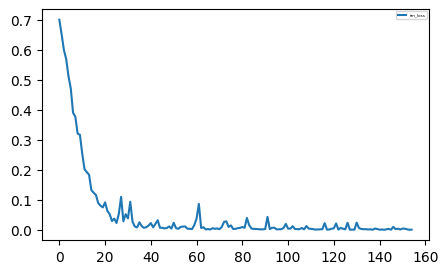

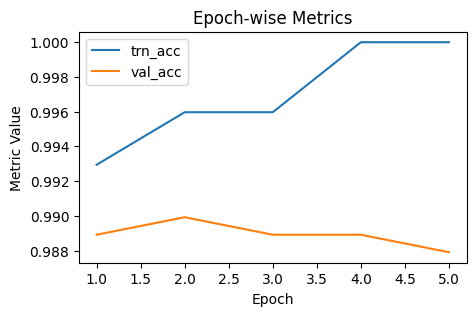

In [ ]:
report.plot(['trn_loss'], sz=3, figsize=(5,3))
report.plot_epochs(['trn_acc','val_acc'], figsize=(5,3))